# Redo ANN and CNN

In [2]:
import os
import pathlib
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
## Enable inline plotting for graphics
%matplotlib inline
## Set default figure size to be larger 
## this may only work in matplotlib 2.0+!
matplotlib.rcParams['figure.figsize'] = [10.0,6.0]
## Enable multiple outputs from jupyter cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
## Get Version information
print(sys.version)
print("Pandas version: {0}".format(pd.__version__))
print("Matplotlib version: {0}".format(matplotlib.__version__))
print("Numpy version: {0}".format(np.__version__))
print("Tensorflow version: {0}".format(tf.__version__))

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version: 0.24.2
Matplotlib version: 3.0.3
Numpy version: 1.16.2
Tensorflow version: 1.13.1


In [5]:
odd_nums = tf.Variable([1,3,5,7,9,11])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
odd_nums.dtype
odd_nums.shape

tf.int32_ref

TensorShape([Dimension(6)])

In [8]:
weird_hypercube = tf.Variable([ [ [43], [121.234] ], [ [987], [2134] ] ], dtype=tf.float64)

In [9]:
rank1 = tf.rank(odd_nums)
rank1

<tf.Tensor 'Rank:0' shape=() dtype=int32>

In [10]:
rank2 = tf.rank(weird_hypercube)
rank2

<tf.Tensor 'Rank_1:0' shape=() dtype=int32>

In [11]:
weird_hypercube

<tf.Variable 'Variable_1:0' shape=(2, 2, 1) dtype=float64_ref>

In [12]:
with tf.Session() as sess:
    sess.run(rank1)
    sess.run(rank2)

1

3

In [13]:
np.random.seed(12)
n = 500
x1 = np.random.normal(loc=100,scale=10,size=n)
error_1 = np.random.normal(loc=0,scale=80,size=n)
y1 = 4+ 33*x1+error_1

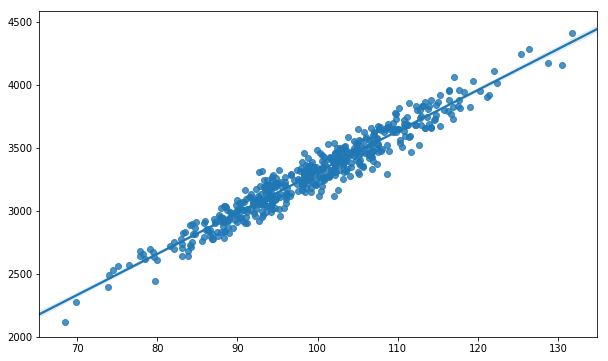

In [14]:
sns.regplot(x1,y1)

In [18]:
from keras import models
from keras import layers
from keras import optimizers
def build_model1():
    model = models.Sequential()
    model.add(layers.Dense(1,activation='linear',input_dim=1))
    sgd = optimizers.SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mse',metrics=['mae'])
    return model

In [19]:
from sklearn import preprocessing
x1_scale = preprocessing.scale(x1)

regr = build_model1()
regr.fit(x1_scale,y1,epochs=20,batch_size=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
500/500 [==============================] - 0s 753us/step - loss: 699983.7763 - mean_absolute_error: 372.4532
Epoch 2/20
500/500 [==============================] - 0s 64us/step - loss: 7120.7456 - mean_absolute_error: 67.6705
Epoch 3/20
500/500 [==============================] - 0s 57us/step - loss: 7053.8442 - mean_absolute_error: 67.7441
Epoch 4/20
500/500 [==============================] - 0s 63us/step - loss: 7232.5252 - mean_absolute_error: 68.3277
Epoch 5/20
500/500 [==============================] - 0s 56us/step - loss: 7097.0318 - mean_absolute_error: 68.0674
Epoch 6/20
500/500 [==============================] - 0s 63us/step - loss: 7040.7138 - mean_absolute_error: 68.0613
Epoch 7/20
500/500 [==============================] - 0s 62us/step - loss: 7117.5627 - mean_absolute_error: 67.8577
Epoch 8/20
500/500 [==============================] - 0s 67us/step - loss: 7122.7897 - mean_absolute_error: 67.9530
Epoch 9/20
500/500 [

In [ ]:
## scale data
from sklearn import preprocessing
x1_scale = preprocessing.scale(x1)

## fit this model/architecture to my data
regr = build_model1()
regr.fit(x1_scale,
         y1,
         epochs = 20,
         batch_size = 20)

In [21]:
regr.summary()
[layer.get_weights() for layer in regr.layers]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


[[array([[320.7813]], dtype=float32), array([3280.8264], dtype=float32)]]

In [22]:
np.random.seed(12)
n=500
x2=np.random.normal(loc=0,scale=3,size=n)
error_1 = np.random.normal(loc=0,scale=0.2,size=n)
y2 = 4+ np.sin(x2)+error_1

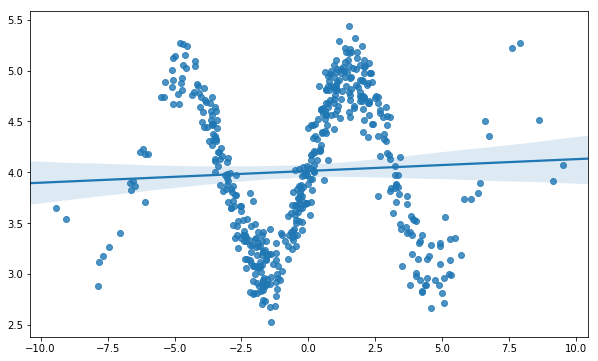

In [23]:
sns.regplot(x2,y2)

In [31]:
def build_model2():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_dim=1))
    model.add(layers.Dense(1,activation='linear'))
    sgd = optimizers.SGD(lr=0.2)
    model.compile(optimizer=sgd, loss='mse',metrics=['mae'])
    return model

In [32]:
x2_scale = preprocessing.scale(x2)
regr2 = build_model2()
regr2.fit(x2_scale,y2,epochs = 20, batch_size = 20)




Epoch 1/20
500/500 [==============================] - 1s 1ms/step - loss: 1.5436 - mean_absolute_error: 0.8794
Epoch 2/20
500/500 [==============================] - 0s 74us/step - loss: 0.6059 - mean_absolute_error: 0.6379
Epoch 3/20
500/500 [==============================] - 0s 90us/step - loss: 0.5722 - mean_absolute_error: 0.6153
Epoch 4/20
500/500 [==============================] - 0s 65us/step - loss: 0.6149 - mean_absolute_error: 0.6179
Epoch 5/20
500/500 [==============================] - 0s 69us/step - loss: 0.4435 - mean_absolute_error: 0.5383
Epoch 6/20
500/500 [==============================] - 0s 74us/step - loss: 0.4451 - mean_absolute_error: 0.5372
Epoch 7/20
500/500 [==============================] - 0s 68us/step - loss: 0.4750 - mean_absolute_error: 0.5251
Epoch 8/20
500/500 [==============================] - 0s 66us/step - loss: 0.4820 - mean_absolute_error: 0.5369
Epoch 9/20
500/500 [==============================] - 0s 63us/step - loss: 0.3564 - mean_absolute_error: 

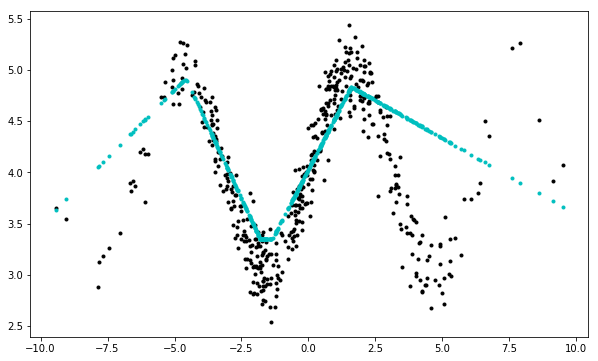

In [34]:
from pylab import *
plot(x2,y2,'k.',x2,regr2.predict(x2_scale),'c.')

In [35]:
regr3 = build_model2()
regr3.fit(x2_scale,
         y2,
         epochs = 100,
         batch_size = 20)

Epoch 1/100
500/500 [==============================] - 1s 1ms/step - loss: 1.5201 - mean_absolute_error: 0.8998
Epoch 2/100
500/500 [==============================] - 0s 82us/step - loss: 0.5398 - mean_absolute_error: 0.6172
Epoch 3/100
500/500 [==============================] - 0s 82us/step - loss: 0.5071 - mean_absolute_error: 0.5575
Epoch 4/100
500/500 [==============================] - 0s 81us/step - loss: 0.5501 - mean_absolute_error: 0.5853
Epoch 5/100
500/500 [==============================] - 0s 80us/step - loss: 0.5209 - mean_absolute_error: 0.5761
Epoch 6/100
500/500 [==============================] - 0s 74us/step - loss: 0.5079 - mean_absolute_error: 0.5653
Epoch 7/100
500/500 [==============================] - 0s 68us/step - loss: 0.4890 - mean_absolute_error: 0.5405
Epoch 8/100
500/500 [==============================] - 0s 79us/step - loss: 0.3652 - mean_absolute_error: 0.4993
Epoch 9/100
500/500 [==============================] - 0s 72us/step - loss: 0.3997 - mean_absolut

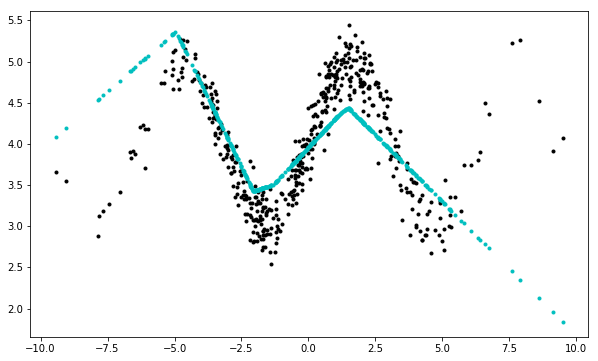

In [36]:
from pylab import *
## plot predictions
plot(x2, y2, 'k.',
     x2, regr3.predict(x2_scale), 'c.')

In [37]:
## fit this model/architecture to my data
regr4 = build_model2()
regr4.fit(x2_scale,
         y2,
         epochs = 300,
         batch_size = 20)

Epoch 1/300
500/500 [==============================] - 1s 1ms/step - loss: 1.2542 - mean_absolute_error: 0.7986
Epoch 2/300
500/500 [==============================] - 0s 73us/step - loss: 0.5757 - mean_absolute_error: 0.6237
Epoch 3/300
500/500 [==============================] - 0s 66us/step - loss: 0.4889 - mean_absolute_error: 0.5760
Epoch 4/300
500/500 [==============================] - 0s 72us/step - loss: 0.3817 - mean_absolute_error: 0.5102
Epoch 5/300
500/500 [==============================] - 0s 72us/step - loss: 0.6551 - mean_absolute_error: 0.5880
Epoch 6/300
500/500 [==============================] - 0s 79us/step - loss: 0.4232 - mean_absolute_error: 0.5428
Epoch 7/300
500/500 [==============================] - 0s 72us/step - loss: 0.5225 - mean_absolute_error: 0.5542
Epoch 8/300
500/500 [==============================] - 0s 73us/step - loss: 0.3910 - mean_absolute_error: 0.4910
Epoch 9/300
500/500 [==============================] - 0s 97us/step - loss: 0.4295 - mean_absolut

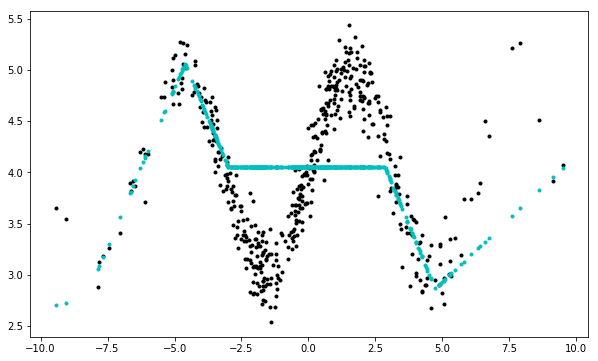

In [38]:
from pylab import *
## plot predictions
plot(x2, y2, 'k.',
     x2, regr4.predict(x2_scale), 'c.')